<center>
    <h1>Prodigy InfoTech Internship</h1>
    <h3> Problem Statement 1 : Predict the prices of houses</h3>
    <p>
        This project aims to build a linear regression model to predict the prices of houses based upon the input features. The goal is to accurately estimates house prices, providing valuable insights for real estate professionals, potential buyers, and sellers.
    </p>
    <h3>Data Description</h3>
    <p>
        The California Housing dataset contains information collected from the 1990 California census.The dataset consists of           consists of 20,640 observations with with the following 8 features:
    </p>
</center>
      <ol>
          <li> MedInc: Median income in block group.</li>
          <li> HouseAge: Median house age in block group. </li>
          <li> AveRooms: Average number of rooms per household. </li>
          <li> AveBedrms: Average number of bedrooms per household. </li>
          <li> Population: Block group population. </li>
          <li> AveOccup: Average number of household members. </li>
          <li> Latitude: Block group latitude. </li>
          <li> Longitude: Block group longitude. </li>
       </ol>
       <h6> The target variable is:</h6>
       <ul>
          <li> MedHouseVal: Median house value for California districts, expressed in hundreds of thousands of dollars.</li>
       </ul>



In [1]:
#Importing the Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Loading the Dataset
df = pd.read_csv('housing.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Data Cleaning

In [7]:
# Cleaning the Data
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
column_name = 'total_bedrooms'
df[column_name] = df[column_name].fillna(df[column_name].mean())

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
corr = df.corr()
corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_9948\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


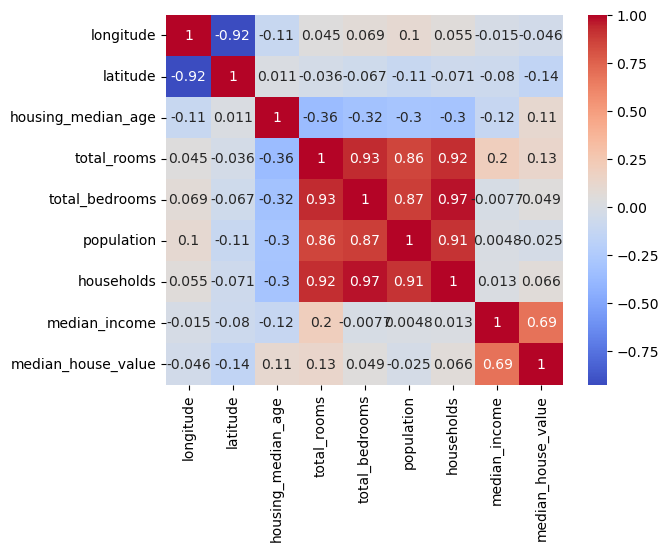

In [12]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Label Encoding

In [13]:
le = LabelEncoder()
df["ocean_proximity"] = le.fit_transform(df["ocean_proximity"])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [14]:
unique_classes = list(le.classes_)
for label, class_name in enumerate(unique_classes):
    print(f"Label {label} is assigned to class: {class_name}")

Label 0 is assigned to class: <1H OCEAN
Label 1 is assigned to class: INLAND
Label 2 is assigned to class: ISLAND
Label 3 is assigned to class: NEAR BAY
Label 4 is assigned to class: NEAR OCEAN


In [15]:
# Separating Input & Output Data
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [16]:
x.shape

(20640, 9)

In [17]:
y.shape

(20640,)

### Removing the Outliers

In [18]:
iso=IsolationForest(random_state=0,contamination=0.05)
clean=iso.fit_predict(x,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
x=x[clean==1]
y=y[clean==1]  

In [20]:
x.shape

(19608, 9)

In [21]:
y.shape

(19608,)

### Feature Scaling

In [22]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Linear Regression Model

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape

(15686, 9)

In [25]:
y_train.shape

(15686,)

In [26]:
# Building the Model
model = LinearRegression()

In [27]:
# Training the Model
model.fit(x_train, y_train)

LinearRegression()

In [28]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred

array([237232.73535144,  50570.74069096, 202475.41071339, ...,
       220806.89606352, 241418.86280544, 204642.32817665])

In [29]:
model_coefficients = model.coef_
model_coefficients

array([-401190.95004576, -386800.25817606,   59608.52725368,
       -132375.04300667,  290049.68053779, -343147.92679831,
        177065.97845877,  611141.03310878,   -1417.13531824])

In [30]:
model_intercept = model.intercept_
model_intercept

342493.57647838944

In [31]:
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6404078437419101


In [32]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 51683.09349317722


In [33]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 4944802666.61276
